In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

__I read the csv file from my computer__

In [14]:
df=pd.read_csv(r'C:\Users\Sareh\Desktop\Project\MarketingRawData.csv')

__Also I read it from its source__

In [33]:
url="https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Introduction%20to%20ML%20-%20Linear%20Regression%20Example/Marketing%20Raw%20Data.csv"

df=pd. read_csv(url)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875,No Promo
181,09/05/2021,20.0,61.0,5.0,17.0,2021.0,Sunday,1303.0,3861.0,871.000,No Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Changing the day names into integers between 0 to 6 just to show how to use replace method__

In [15]:
#df['Day_Name']=df['Day_Name'].replace({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})


__I am going to creat randomly some null values in the Visitors column__

In [17]:
ListOfDate=list(enumerate(df.Date))

import random
RandomInt=[random.randint(0,len(df)-5) for i in range(50)]
for i,j in ListOfDate:
    if i in RandomInt:
        df.loc[i,'Visitors']=np.nan

__I am going to fill the null values of Visitors by mean value of visitors per day__

Firstly, I group the rows by day name in order to get data frames whose day_name is just one of the 0 to 6.

In [26]:
GroupByDay=df.groupby('Day_Name',as_index=False)

__groupby by days then find the mean values:__

In [ ]:
day_based_data_frameList=[]
for day , day_based_data_frame in GroupByDay:
    day_based_data_frameList.append(day_based_data_frame)
    meanv=day_based_data_frame.Visitors.mean()
    day_based_data_frame=day_based_data_frame.fillna(value={'Visitors':meanv},inplace=True)
Concatenated=pd.concat(day_based_data_frameList)
Concatenated.isnull().sum()

In [24]:
df=Concatenated

__Another way of filling null values__

In [25]:
for i , j in enumerate(np.unique(df.Day_Name)):
    Meanvalue=df.loc[df['Day_Name'] == j, 'Visitors'].mean()
    df['Visitors'].mask(df['Visitors'].isnull()== True, Meanvalue, inplace=True)

In [8]:
df['Visitors'].isnull().sum()

0

__We could also use dropna method to remove all the null values in the whole data frame__

In [82]:
df.dropna(inplace=True)

__Or we could drop the null values just from one column__

In [83]:
df.dropna(subset=['Week'],inplace=True)

__Knowing some statistics of the data from based on the distict values in each column__

In [8]:
for column in df.columns:
    Distinct=np.unique(df[column])
    nr_unique=len(Distinct)
    if nr_unique<10:
        print("the number of distinct values in {} is {} and they are {}".format(column,nr_unique,Distinct))
    else:
        print("the number of distinct values in {} is {}".format(column,nr_unique))

the number of distinct values in Date is 182
the number of distinct values in Week is 28
the number of distinct values in Month is 7 and they are [ 1.  2.  3.  4.  5. 11. 12.]
the number of distinct values in Year is 2 and they are [2020. 2021.]
the number of distinct values in Day_Name is 7 and they are ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
the number of distinct values in Visitors is 175
the number of distinct values in Revenue is 181
the number of distinct values in Marketing Spend is 182
the number of distinct values in Promo is 3 and they are ['No Promo' 'Promotion Blue' 'Promotion Red']


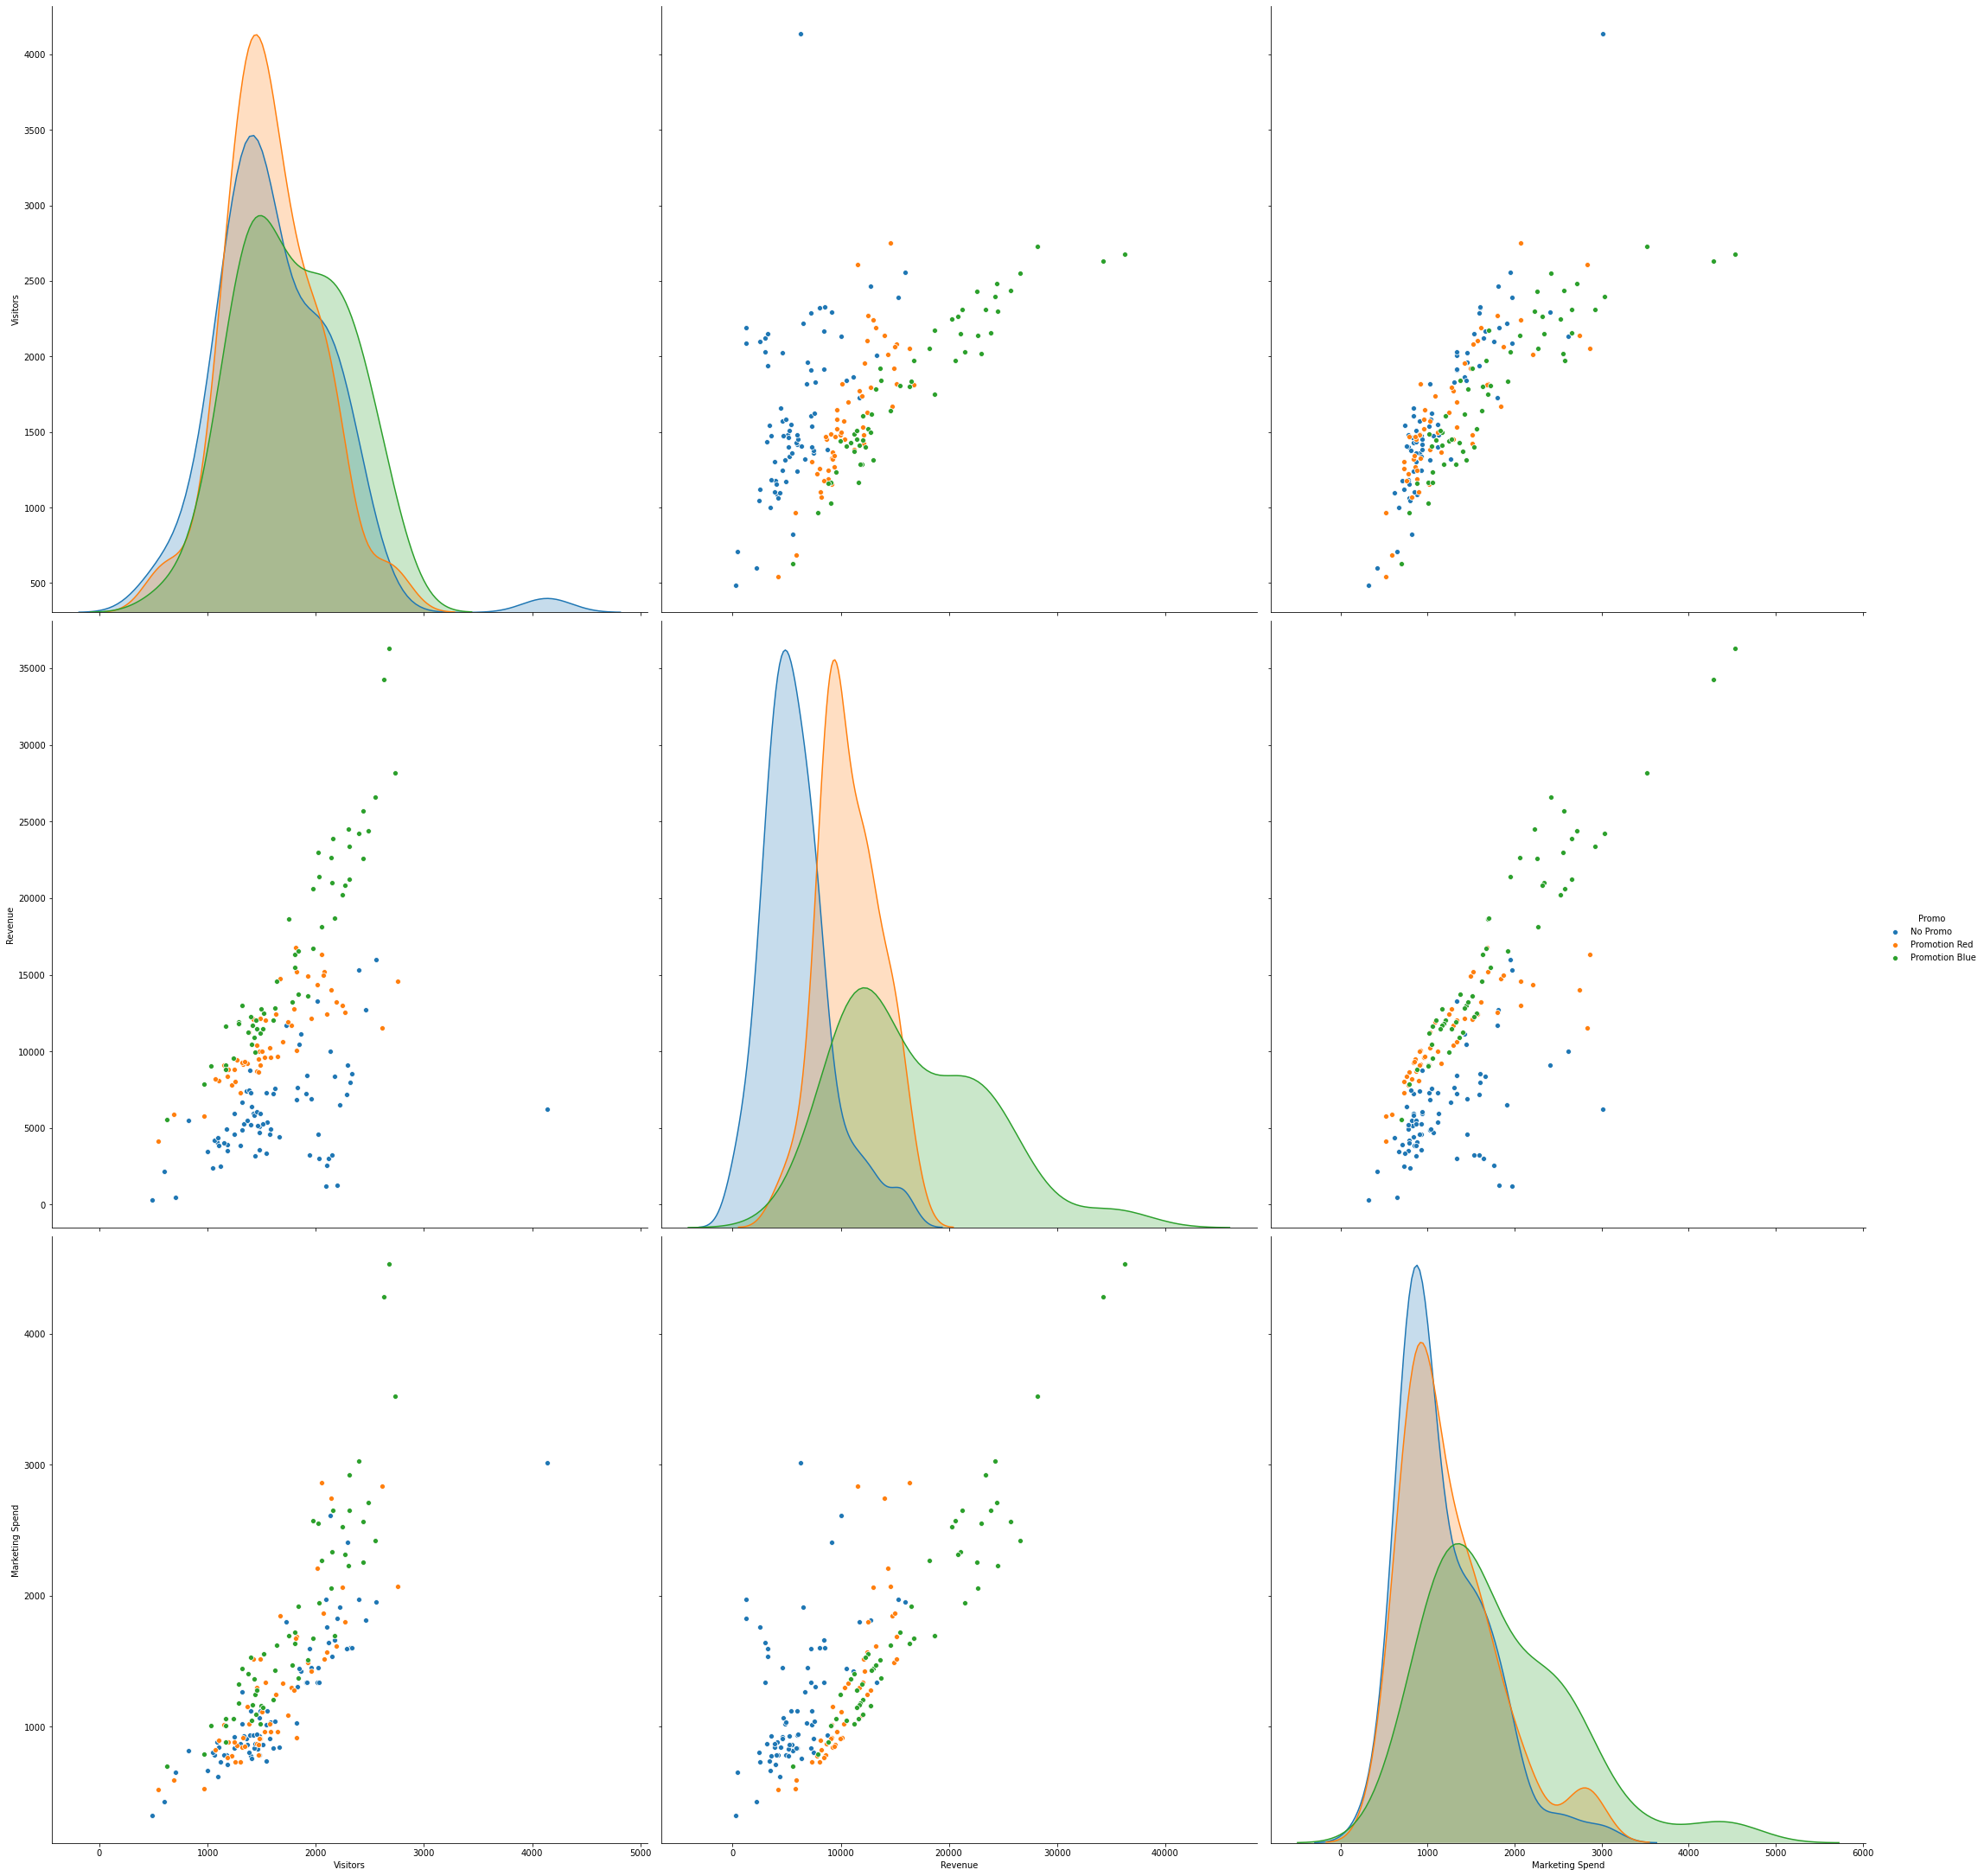

In [10]:
import seaborn as sns
PairPlot=sns.pairplot(data=df[['Visitors', 'Revenue','Marketing Spend', 'Promo']], height=10, hue='Promo')

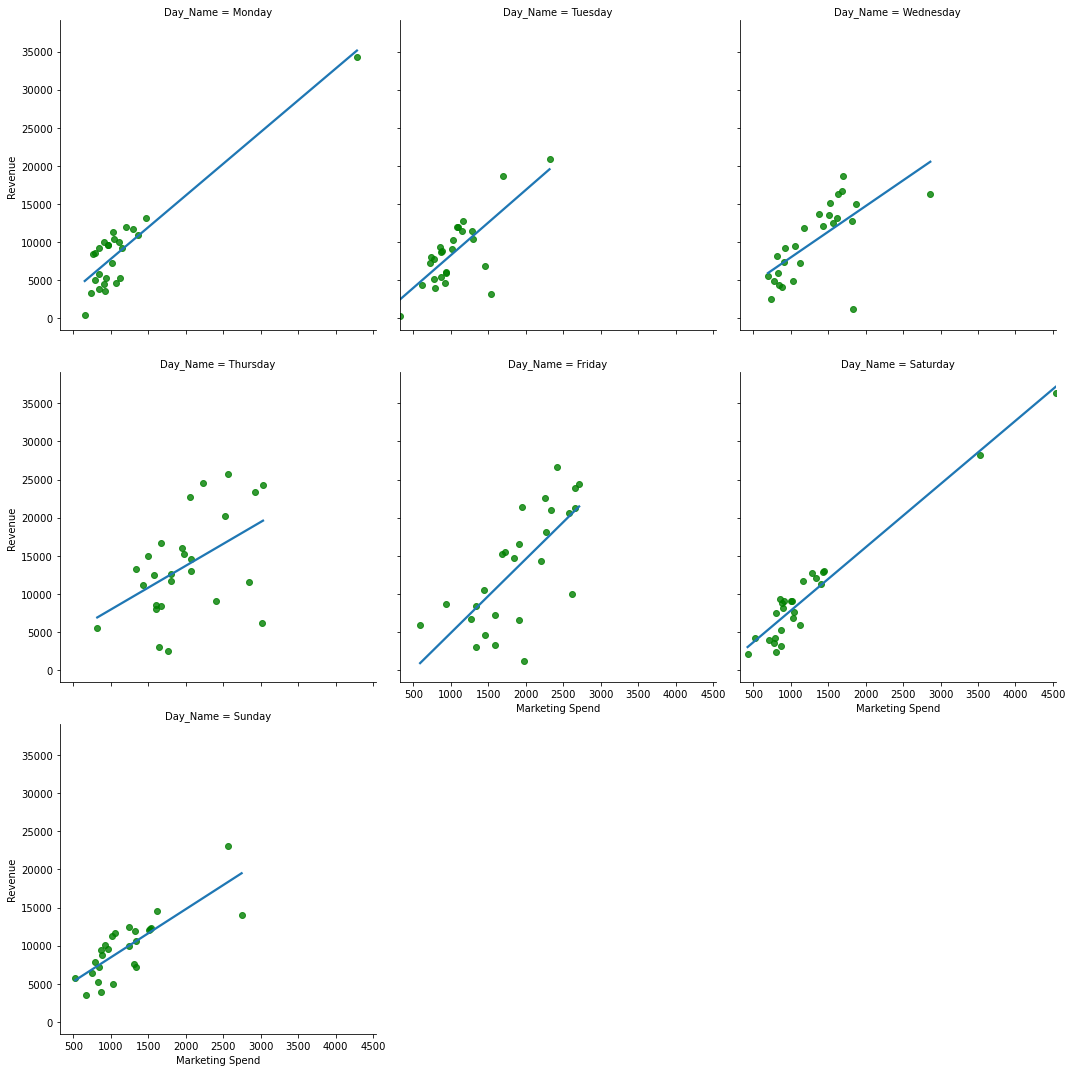

In [11]:
LineScatter=sns.lmplot(x='Marketing Spend',y='Revenue',data=df,col='Day_Name',col_wrap=3,scatter_kws={'color':'green'},ci=False)

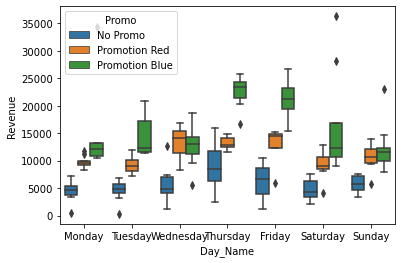

In [12]:
BoxPlot=sns.boxplot(x='Day_Name',y='Revenue',data=df,hue='Promo')

__After visualization we can get rid of outliers__

In [4]:
df=df[df['Revenue']<27000]
df=df[['Revenue','Day_Name','Visitors','Marketing Spend','Promo']]

In [6]:
new_df=pd.get_dummies(df,columns=['Promo','Day_Name'])

In [7]:
#feature selection
hm=df[['Revenue','Marketing Spend','Visitors']].corr()


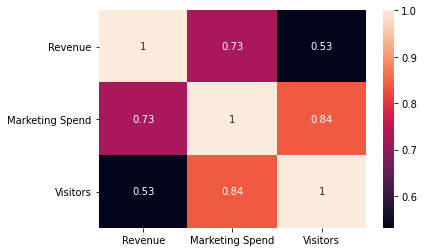

In [17]:
sns.heatmap(hm,annot=True)

In [8]:

X=new_df.drop('Revenue',axis=1).values
y=new_df['Revenue'].values
y

array([  465., 10386., 12475., 11712., 10000., 12996., 11929.,  5359.,
       12016.,  7441.,  8000., 15188.,  3926., 14012., 18650.,  5574.,
       12425., 14760.,  8091., 10647.,  7290.,  4587., 12154.,  8400.,
       20607.,  3525., 10075.,  9612.,  6908., 12740., 15288.,  6654.,
        9097.,  8802., 11679., 11952.,  4873.,  8516., 18161.,  8800.,
        7655., 12038., 10245., 11817., 15991., 21031., 23014.,  5100.,
        7793.,  9180.,  9125., 21428.,  9062.,  9952.,  4714.,  9418.,
       16325.,  6254.,  7215., 11249., 12129.,  4581.,  8702.,  5937.,
       14568., 21245., 11699.,  9602.,  8633.,  7287.,  4403.,  3021.,
       24417.,  6837., 12445., 10925.,   292.,  4085., 11156., 10485.,
        4225.,  4953., 10479., 12783., 18678., 13281., 14356.,  9095.,
        7264.,  5263., 20860., 13602.,  5519.,  8741.,  2184.,  5772.,
        9987.,  5966.,  4910., 24247.,  3025.,  2409.,  5171.,  5847.,
        9135., 13719., 20237., 26608., 12789.,  7222., 13212.,  4376.,
      

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=15)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=15)

In [10]:
for i , column in enumerate(new_df.drop('Revenue',axis=1)):
    print('The feature importance is {} for {}'.format(column,dt.feature_importances_[i]))

The feature importance is Visitors for 0.33153942875389264
The feature importance is Marketing Spend for 0.43772438071512443
The feature importance is Promo_No Promo for 0.031524765754623776
The feature importance is Promo_Promotion Blue for 0.04735971403271349
The feature importance is Promo_Promotion Red for 0.04455146875064078
The feature importance is Day_Name_Friday for 0.012798577133820902
The feature importance is Day_Name_Monday for 0.014293789064356412
The feature importance is Day_Name_Saturday for 0.013437595554722794
The feature importance is Day_Name_Sunday for 0.016428019415793815
The feature importance is Day_Name_Thursday for 0.019710278386774964
The feature importance is Day_Name_Tuesday for 0.01734370692516994
The feature importance is Day_Name_Wednesday for 0.013288275512365975


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=80,random_state=15)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import  metrics

In [20]:
lr=LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.score(X_train,y_train)

0.791981609942386

In [23]:
y_predict=lr.predict(X_train)
r2_score(y_train,y_predict)

0.791981609942386